# Importing Dataset and Libraries

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import warnings

# Load the NIST handwritten digit dataset
digits = load_digits()

# Convert the dataset to a DataFrame for easier manipulation
data = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
data['target'] = digits.target
X = digits.data

# Standardize the data for better performance with SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data) # Calculates mean and std for each pixel value and scales the data
y = digits.target

In [169]:
# Choose an example digit (e.g., index 0)
index = 0
digit = digits.images[index]  # 8x8 image

# Print label
print(f"Label: {digits.target[index]}")
print("Pixel values:")

# Print pixel values as a table
for row in digit:
    print(" ".join(f"{int(val):2d}" for val in row))

Label: 0
Pixel values:
 0  0  5 13  9  1  0  0
 0  0 13 15 10 15  5  0
 0  3 15  2  0 11  8  0
 0  4 12  0  0  8  8  0
 0  5  8  0  0  9  8  0
 0  4 11  0  1 12  7  0
 0  2 14  5 10 12  0  0
 0  0  6 13 10  0  0  0


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

# Suppose X, y are your features and labels
pca_svc = Pipeline([
    ('pca', PCA(random_state=42)),
    ('clf', SVC(kernel='linear', random_state=42))
])

# param_grid = {
#     'pca__n_components': list(range(1, 65)),  # Range from 1 to 64
#     'clf__C': [0.1, 1, 10, 100]  # Tuning the regularization parameter C
# }

param_grid = {
    'pca__n_components': [64],  # Test with only 1 component
    'clf__C': [10]  # Test with only C=1
}

grid = GridSearchCV(pca_svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'clf__C': 10, 'pca__n_components': 64}
Best score: 0.9465892912411018


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=15)  # Reduce to 2 dimensions for visualization
X_reduced = pca.fit_transform(X)

# Apply UMAP for further dimensionality reduction
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_reduced)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print training and test scores
train_score = svm_classifier.score(X_train, y_train)
test_score = svm_classifier.score(X_test, y_test)
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

# Cross-validation scores
cv_scores = cross_val_score(svm_classifier, X_reduced, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation score: {cv_scores.mean()}")

c:\Users\qoste\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       1.00      0.94      0.97        33
           3       0.97      1.00      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.92      1.00      0.96        34
           8       0.94      0.97      0.95        30
           9       0.97      0.80      0.88        40

    accuracy                           0.97       360
   macro avg       0.96      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Training Score: 0.9575504523312457
Test Score: 0.9666666666666667
Cross-validation scores: [0.92777778 0.86111111 0.94707521 0.94707521 0.89972145]
Mean Cross-validation score: 0.9165521510

# Dimension Reductionality Techniques

# TSNE

Nonlinear, not suitable for SVM classifier

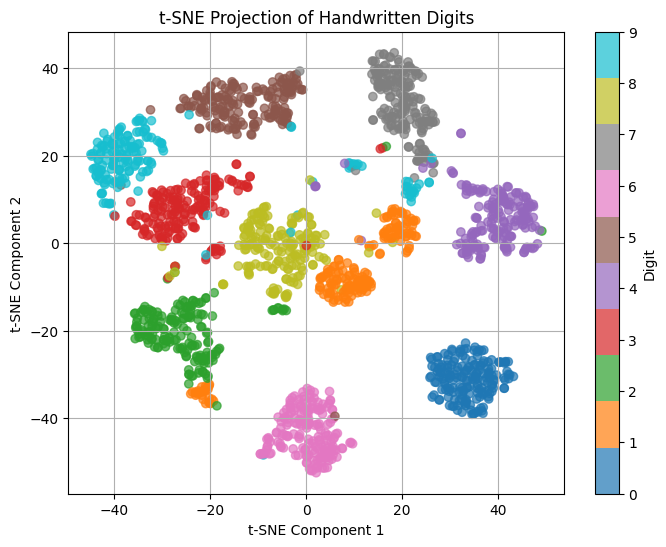

In [129]:
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE projection
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Handwritten Digits')
plt.colorbar(label='Digit')
plt.grid(True)
plt.show()


# PCA & UMAP

Explain PCA & UMAP here

In [9]:
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import umap.umap_ as umap

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import umap.umap_ as umap

def find_best_dimensionality(X, y, max_dim=64, method="PCA"):
    """
    Finds the best dimensionality for either PCA or UMAP based on SVM performance using GridSearchCV.

    Parameters:
        X (array-like): Feature matrix.
        y (array-like): Target labels.
        max_dim (int): Maximum number of dimensions to test.
        method (str): Dimensionality reduction method ("PCA" or "UMAP").

    Returns:
        best_params (dict): Best parameters found by GridSearchCV.
        best_score (float): Best cross-validation score.
    """
    # Choose the dimensionality reduction method
    if method == "PCA":
        reducer = PCA(random_state=42)
        param_grid = {'reducer__n_components': list(range(1, max_dim + 1))}
    elif method == "UMAP":
        reducer = umap.UMAP(random_state=42)
        param_grid = {'reducer__n_components': list(range(1, max_dim + 1))}
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 'UMAP'.")

    # Create a pipeline with the dimensionality reduction and SVM
    pipeline = Pipeline([
        ('reducer', reducer),
        ('clf', SVC(kernel='linear', random_state=42))
    ])

    # Use GridSearchCV to find the best number of components
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1
    )
    grid_search.fit(X, y)

    # Return the best parameters and score
    return grid_search.best_params_, grid_search.best_score_

c:\Users\qoste\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [194]:

def plot_dimensionality_results(method, best_n_components, best_fitted_n_components, scores, overfitting_results):
    """
    Plots the results of dimensionality reduction (PCA or UMAP) and SVM performance.

    Parameters:
        method (str): Dimensionality reduction method ("PCA" or "UMAP").
        best_n_components (int): Best number of components based on cross-validation score.
        best_fitted_n_components (int): Best number of components based on smallest train-test score difference.
        scores (list): Cross-validation scores for each dimensionality.
        overfitting_results (list): Train and test scores for each dimensionality.
    """
    print(f"Best number of {method} components: {best_n_components}")
    print(f"Score ({best_n_components}): {max(scores):.4f}")

    # Plot the scores for each number of components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')

    # Highlight the best component number
    plt.scatter(best_n_components, max(scores), color='red', label='Best Component', zorder=5)
    plt.annotate(f'Best: {best_n_components}\nScore: {max(scores):.4f}', 
                 (best_n_components, max(scores)), 
                 textcoords="offset points", 
                 xytext=(10, -40), 
                 ha='center', color='red')

    # Add a horizontal line at the best score
    plt.axhline(y=max(scores), color='red', linestyle='--', label='Best Score')

    # Add labels and grid
    plt.title(f'SVM Performance vs. {method} Components')
    plt.xlabel(f'Number of {method} Components')
    plt.ylabel('Cross-Validation Score')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot test score vs. training score for each dimension
    train_scores = [result[1] for result in overfitting_results]
    test_scores = [result[2] for result in overfitting_results]

    # Find the best-fitted component (smallest train-test difference)
    best_fitted_index = best_fitted_n_components - 1  # Adjust for 0-based index
    best_fitted_train_score = train_scores[best_fitted_index]
    best_fitted_test_score = test_scores[best_fitted_index]

    # Find the best test score
    best_test_score = max(test_scores)
    best_test_index = test_scores.index(best_test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_scores) + 1), train_scores, marker='o', linestyle='-', color='g', label='Training Score')
    plt.plot(range(1, len(test_scores) + 1), test_scores, marker='o', linestyle='-', color='orange', label='Test Score')

    # Highlight the best-fitted component
    plt.scatter(best_fitted_n_components, best_fitted_train_score, color='red', label='Best Fitted', zorder=5)
    plt.annotate(f'Best Fitted: {best_fitted_n_components}\nTrain: {best_fitted_train_score:.4f}\nTest: {best_fitted_test_score:.4f}', 
                 (best_fitted_n_components, best_fitted_test_score), 
                 textcoords="offset points", 
                 xytext=(10, -70), 
                 ha='center', color='red')

    # Highlight the best cross-validation component
    best_cv_train_score = train_scores[best_n_components - 1]
    best_cv_test_score = test_scores[best_n_components - 1]
    plt.scatter(best_n_components, best_cv_test_score, color='blue', label='Best CV', zorder=5)
    plt.annotate(f'Best CV: {best_n_components}\nTrain: {best_cv_train_score:.4f}\nTest: {best_cv_test_score:.4f}\nCV: {max(scores):.4f}', 
                 (best_n_components, best_cv_test_score), 
                 textcoords="offset points", 
                 xytext=(10, -70), 
                 ha='center', color='blue')

    # Highlight the best test score component
    best_test_train_score = train_scores[best_test_index]
    plt.scatter(best_test_index + 1, best_test_score, color='purple', label='Best Test', zorder=5)
    plt.annotate(f'Best Test: {best_test_index + 1}\nTrain: {best_test_train_score:.4f}\nTest: {best_test_score:.4f}', 
                 (best_test_index + 1, best_test_score), 
                 textcoords="offset points", 
                 xytext=(10, -40), 
                 ha='center', color='purple')

    # Add labels and grid
    plt.title(f'Training vs. Test Score for Each {method} Dimension')
    plt.xlabel(f'Number of {method} Components')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

        # Plot cross-validation and test scores for each dimension
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Score')
    plt.plot(range(1, len(test_scores) + 1), test_scores, marker='o', linestyle='-', color='orange', label='Test Score')

    # Highlight the best cross-validation score
    plt.scatter(best_n_components, max(scores), color='red', label='Best CV Score', zorder=5)
    plt.annotate(f'Best CV: {best_n_components}\nCV Score: {max(scores):.4f}', 
                 (best_n_components, max(scores)), 
                 textcoords="offset points", 
                 xytext=(10, -70), 
                 ha='center', color='red')

    # Highlight the best test score
    plt.scatter(best_test_index + 1, best_test_score, color='purple', label='Best Test Score', zorder=5)
    plt.annotate(f'Best Test: {best_test_index + 1}\nTest Score: {best_test_score:.4f}', 
                 (best_test_index + 1, best_test_score), 
                 textcoords="offset points", 
                 xytext=(10, -40), 
                 ha='center', color='purple')

    # Add labels and grid
    plt.title(f'Cross-Validation and Test Scores for Each {method} Dimension')
    plt.xlabel(f'Number of {method} Components')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## PCA

In [10]:
# Find the best number of components for the SVM classifier (PCA)
best_params, best_score = find_best_dimensionality(X, y, max_dim=64, method="PCA")
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'reducer__n_components': 44}
Best Score: 0.9476973073351903


Best number of PCA components: 51
Score (51): 0.9742


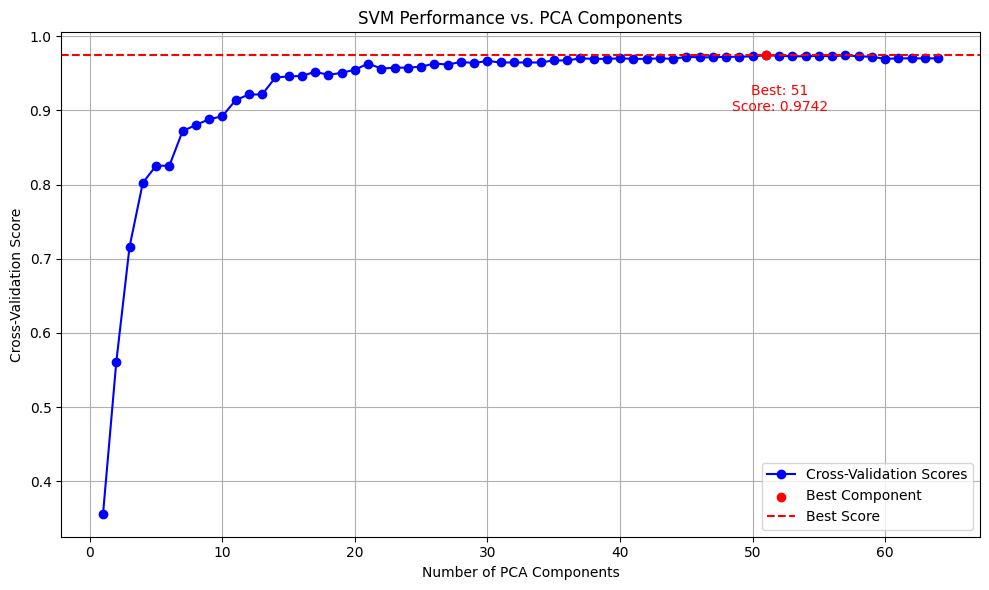

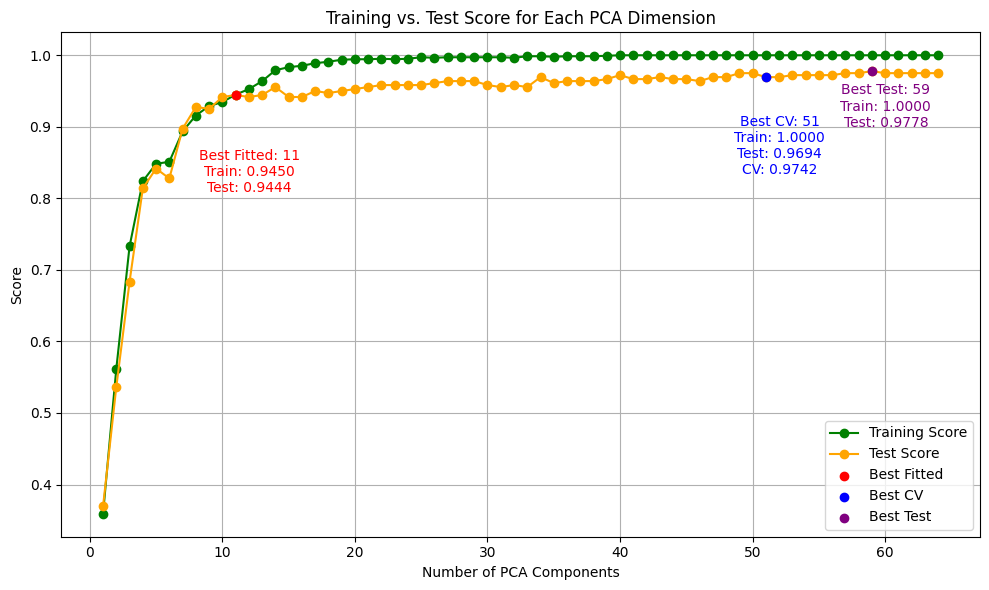

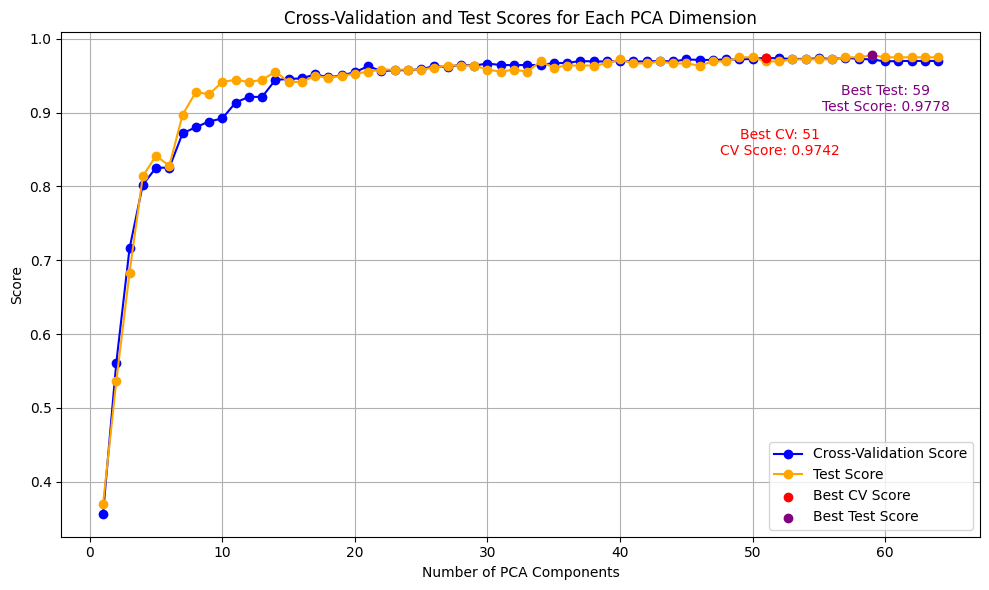

In [195]:
plot_dimensionality_results(
    method="PCA",
    best_n_components=best_n_components_pca,
    best_fitted_n_components=best_fitted_n_components_pca,
    scores=scores_pca,
    overfitting_results=overfitting_results_pca
)

## UMAP

In [168]:
# Find the best number of components for the SVM classifier (UMAP)
best_n_components_umap, best_fitted_n_components_umap, scores_umap, overfitting_results_umap = find_best_dimensionality(X_scaled, y, method="UMAP")

Testing UMAP with 1 components
Testing UMAP with 2 components
Testing UMAP with 3 components
Testing UMAP with 4 components
Testing UMAP with 5 components
Testing UMAP with 6 components
Testing UMAP with 7 components
Testing UMAP with 8 components
Testing UMAP with 9 components
Testing UMAP with 10 components
Testing UMAP with 11 components
Testing UMAP with 12 components
Testing UMAP with 13 components
Testing UMAP with 14 components
Testing UMAP with 15 components
Testing UMAP with 16 components
Testing UMAP with 17 components
Testing UMAP with 18 components
Testing UMAP with 19 components
Testing UMAP with 20 components
Testing UMAP with 21 components
Testing UMAP with 22 components
Testing UMAP with 23 components
Testing UMAP with 24 components
Testing UMAP with 25 components
Testing UMAP with 26 components
Testing UMAP with 27 components
Testing UMAP with 28 components
Testing UMAP with 29 components
Testing UMAP with 30 components
Testing UMAP with 31 components
Testing UMAP with

Best number of UMAP components: 17
Score (17): 0.9736


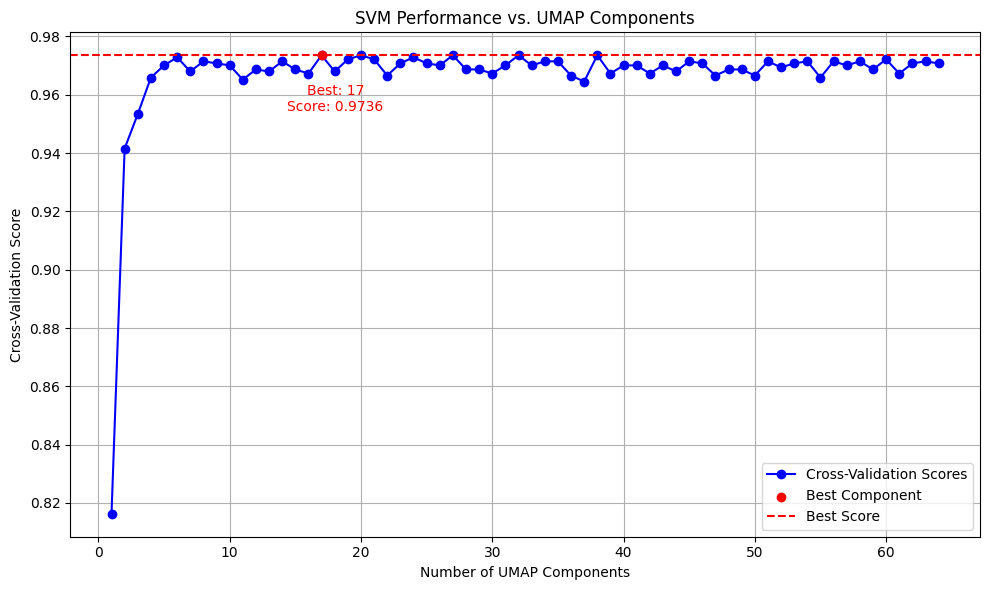

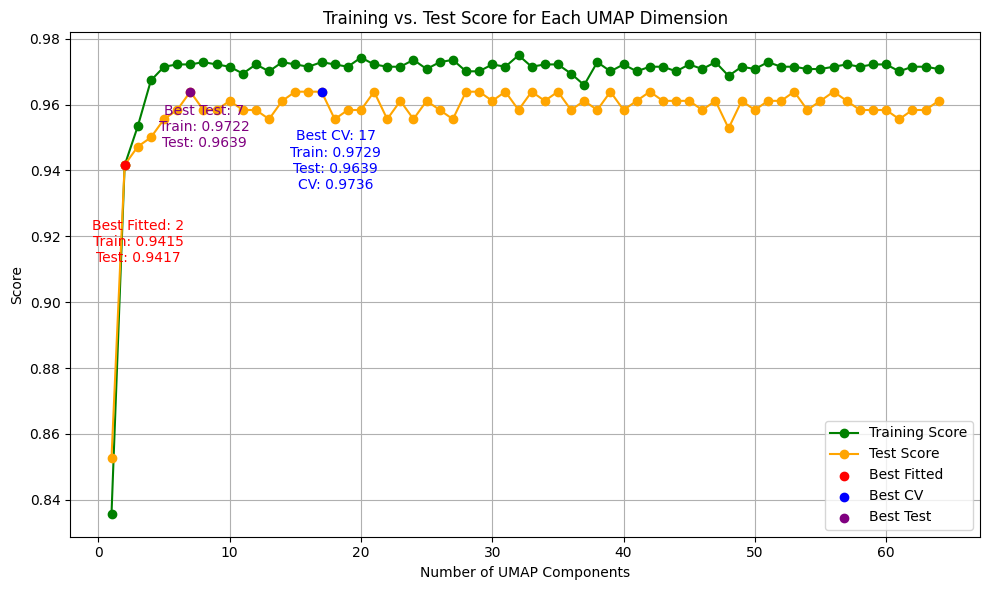

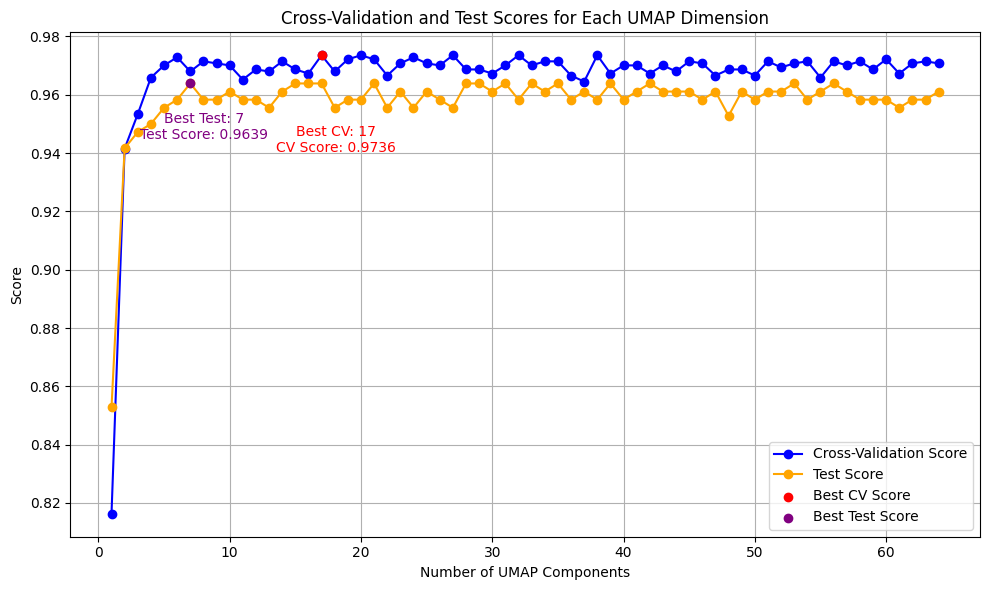

In [196]:
plot_dimensionality_results(
    method="UMAP",
    best_n_components=best_n_components_umap,
    best_fitted_n_components=best_fitted_n_components_umap,
    scores=scores_umap,
    overfitting_results=overfitting_results_umap
)

### PCA and UMAP Projections

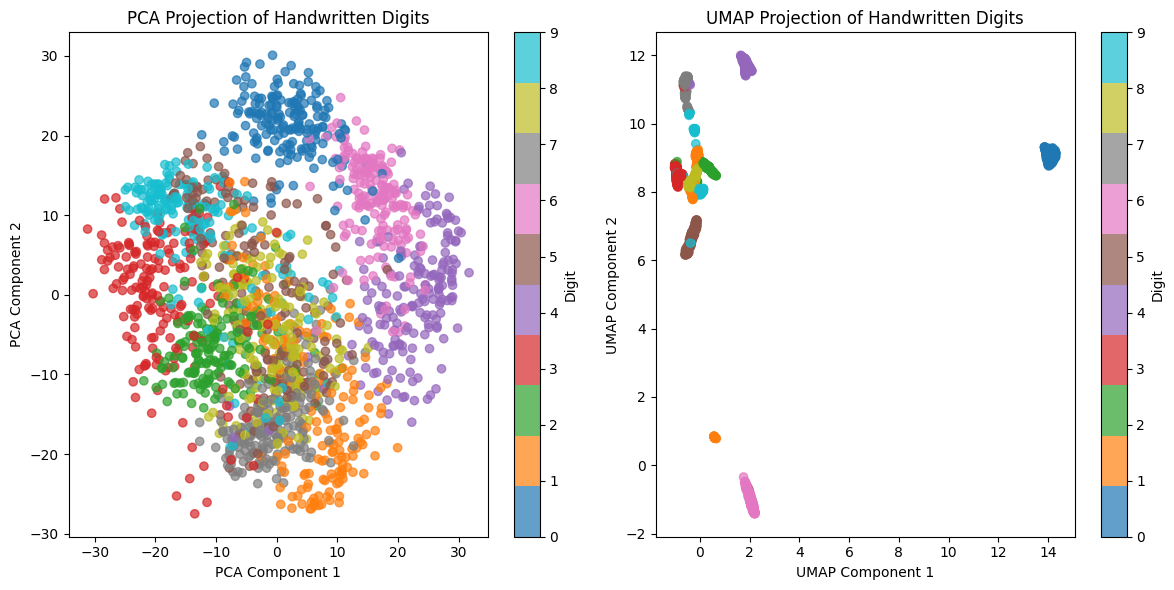

In [68]:
import matplotlib.pyplot as plt

# Step 3: Plot PCA Projection
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Creates a subplot (1 row, 2 columns, first plot)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Handwritten Digits')
plt.colorbar(label='Digit')

# Step 4: Plot UMAP Projection
plt.subplot(1, 2, 2)  # Second plot in the subplot grid
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Projection of Handwritten Digits')
plt.colorbar(label='Digit')

# Step 5: Display the plots
plt.tight_layout()

plt.show()

In [1]:
from sklearn import datasets

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

# Convert labels to integers
y = y.astype(int)

# # Scale the data for better performance
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
# svm_clf = SVC(kernel='linear', random_state=42)
# svm_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = svm_clf.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

c:\Users\qoste\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


NameError: name 'train_test_split' is not defined

In [ ]:
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import umap.umap_ as umap

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import umap.umap_ as umap

def find_best_dimensionality(X, y, max_dim=2, method="PCA"):
    """
    Finds the best dimensionality for either PCA or UMAP based on SVM performance using GridSearchCV.

    Parameters:
        X (array-like): Feature matrix.
        y (array-like): Target labels.
        max_dim (int): Maximum number of dimensions to test.
        method (str): Dimensionality reduction method ("PCA" or "UMAP").

    Returns:
        best_params (dict): Best parameters found by GridSearchCV.
        best_score (float): Best cross-validation score.
    """
    # Choose the dimensionality reduction method
    if method == "PCA":
        reducer = PCA(random_state=42)
        param_grid = {'reducer__n_components': list(range(1, max_dim + 1))}
    elif method == "UMAP":
        reducer = umap.UMAP(random_state=42)
        param_grid = {'reducer__n_components': list(range(1, max_dim + 1))}
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 'UMAP'.")

    # Create a pipeline with the dimensionality reduction and SVM
    pipeline = Pipeline([
        ('reducer', reducer),
        ('clf', SVC(kernel='linear', random_state=42))
    ])

    # Use GridSearchCV to find the best number of components
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1
    )
    grid_search.fit(X, y)

    # Return the best parameters and score
    return grid_search.best_params_, grid_search.best_score_

c:\Users\qoste\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
best_params, best_score = find_best_dimensionality(X_train, y_train, max_dim=2, method="PCA")

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

NameError: name 'find_best_dimensionality' is not defined